<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home"><center>CRISP-DM Methodology</center></h3>

* [Buissness Understanding](#1)
* [Data Understanding](#2)
* [Data Preparation](#3)
* [Data Modeling](#4)   
* [Data Evaluation](#5)
    

In this section we overview our selected method for engineering our solution. CRISP-DM stands for Cross-Industry Standard Process for Data Mining. It is an open standard guide that describes common approaches that are used by data mining experts. CRISP-DM includes descriptions of the typical phases of a project, including tasks details and provides an overview of the data mining lifecycle. The lifecycle model consists of six phases with arrows indicating the most important and frequent dependencies between phases. The sequence of the phases is not strict. In fact, most projects move back and forth between phases as necessary. It starts with business understanding, and then moves to data understanding, data preparation, modelling, evaluation, and deployment. The CRISP-DM model is flexible and can be customized easily.
## Buissness Understanding

    Tasks:

    1.Determine business objectives

    2.Assess situation

    3.Determine data mining goals

    4.Produce project plan

## Data Understanding
     Tasks:

    1.Collect data

    2.Describe data

    3.Explore data    

## Data Preparation
    Tasks
    1.Data selection

    2.Data preprocessing

    3.Feature engineering

    4.Dimensionality reduction

            Steps:

            Data cleaning

            Data integration

            Data sampling

            Data dimensionality reduction

            Data formatting

            Data transformation

            Scaling

            Aggregation

            Decomposition

## Data Modeling :

Modeling is the part of the Cross-Industry Standard Process for Data Mining (CRISP-DM) process model that i like best. Our data is already in good shape, and now we can search for useful patterns in our data.

   Tasks
    1. Select modeling technique Select technique

    2. Generate test design

    3. Build model

    4. Assess model

## Data Evaluation :
    Tasks

    1.Evaluate Result

    2.Review Process

    3.Determine next steps

<a id=1></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Buissness Understanding</center></h3>

    
The dataset is used for this competition is synthetic but based on a real dataset and generated using a CTGAN. The original dataset deals with predicting the amount of an insurance claim. Although the features are anonymized, they have properties relating to real-world features.

**Eval Metric**: Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target
    

    
## Step 1: Import helpful libraries

In [ ]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import matplotlib.gridspec as gridspec
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
# Preparation  
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler,Normalizer,RobustScaler,MaxAbsScaler,MinMaxScaler,QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
# Import StandardScaler from scikit-learn

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer,IterativeImputer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline,FeatureUnion
from sklearn.manifold import TSNE
# Import train_test_split()
# Metrics
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve,confusion_matrix
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.linear_model import LogisticRegression

import tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
#import smogn
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
# For training random forest model
import lightgbm as lgb
from scipy import sparse
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
# Model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif,chi2
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif,VarianceThreshold

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
import lightgbm as lgbm
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBClassifier
from sklearn import set_config

from itertools import combinations
#import smong 

import category_encoders as ce
import warnings
import optuna 
from joblib import Parallel, delayed
import joblib 
from sklearn import set_config
set_config(display='diagram')
warnings.filterwarnings('ignore')

In [ ]:
!python --version 

In [ ]:
!conda --version

In [ ]:
class FeaturesEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def mc_cat(self,val):
        if val == 0:
            return 0
        elif val == 1 or val == 14:
            return 1
        else:
            return 2
    def transform(self, X, y=None):
        # Calculate some metrics across rows
        X["num_missing"]  = X.isnull().sum(axis=1)
        X["std_row"] = X.std(axis=1)
        X["sem_row"] = X.sem(axis=1)
        X["abs_sum_row"] = X.abs().sum(axis=1)
        X["mean_row"] = X.mean(axis=1)
        X["max_row"]= X.max(axis=1)
        X["min_row"]= X.min(axis=1)
        X['mc_cat'] = X['num_missing'].apply(self.mc_cat)
        return X   
    
#######################################################
# Kmeans Features  : 
# add columns with kmeans, assuming input already scaled
#######################################################
# Kmeans Features  : 
# add columns with kmeans, assuming input already scaled
from sklearn.cluster import MiniBatchKMeans, KMeans
class MiniKmeansTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, num_clusters = 6):
        self.num_clusters = num_clusters
        if self.num_clusters > 0:
            self.kmeans = MiniBatchKMeans(n_clusters=self.num_clusters, random_state=0)
    
    def fit(self, X, y=None):
        if self.num_clusters > 0:
            self.kmeans.fit(X)
        return self
    
    def transform(self, X, y=None):
        pred_classes =self.kmeans.predict(X).reshape(-1,1)
        pred_classes=(pred_classes - np.min(pred_classes)) / (np.max(pred_classes) - np.min(pred_classes))
        return np.hstack((X, pred_classes))

    
class ColumnSelector(BaseEstimator, TransformerMixin):
    """Select only specified columns."""
    def __init__(self, positions):
        self.positions = positions
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        #return np.array(X)[:, self.positions]
        return X.loc[:, self.positions]
  
# Quantile Outlier Handling 
class OutlierReplace(BaseEstimator,TransformerMixin):
    def __init__(self,factor=1.5):
        self.factor = factor

    def outlier_removal(self,X,y=None):
        X = pd.Series(X).copy()
        qmin=X.quantile(0.05)
        qmax=X.quantile(0.95)
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (self.factor * iqr)
        upper_bound = q3 + (self.factor * iqr)
        #X.loc[((X < lower_bound) | (X > upper_bound))] = np.nan 
        X.loc[X < lower_bound] = qmin
        X.loc[X > upper_bound] = qmax
        return pd.Series(X)

    def fit(self,X,y=None):
        return self

    def transform(self,X,y=None):
        return X.apply(self.outlier_removal)
    


## Step 2: Load the data
complete guid to read data : 

https://github.com/DeepSparkChaker/CRISPDM_ULTIME/blob/main/CRISPDM_0_StreamlinedDataIngestionWithPandas.ipynb


Next, we'll load the training and test data.

We set index_col=0 in the code cell below to use the id column to index the DataFrame. (If you're not sure how this works, try temporarily removing index_col=0 and see how it changes the result.)

In [ ]:
# import lux
# Load the training data
train = pd.read_csv("../input/tabular-playground-series-sep-2021/train.csv")
test = pd.read_csv("../input/tabular-playground-series-sep-2021/test.csv")
# Preview the data
train.head()


<a id=2></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Data Understanding</center></h3>


### Explore the data

    Null Data
    Categorical data
    Itrain.isnull().sum().valuess there Text data
    wich columns will we use
    IS there outliers that can destory our algo
    IS there diffrent range of data
    Curse of dimm...
    
This step is done in this notebook : 

https://www.kaggle.com/bannourchaker/crispdm-dataunderstanding-part1-private

https://www.kaggle.com/bannourchaker/step0-complete-eda-dataunderstanding?scriptVersionId=74464212
 
 https://www.kaggle.com/bannourchaker/crispdm-1-dataunderstanding-part1
 
 https://github.com/DeepSparkChaker/CRISPDM_ULTIME/blob/main/CRISPDM_1_%20Data_preprocessing.ipynb
 
 https://github.com/trainindata/deploying-machine-learning-models/blob/master/section-04-research-and-development/01-machine-learning-pipeline-data-analysis.ipynb
    
    
If you like my work just upvote :) 




    



# Convert Dtypes :

In [ ]:
train[train.select_dtypes(['float64']).columns] = train[train.select_dtypes(['float64']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object']).columns] = train.select_dtypes(['object']).apply(lambda x: x.astype('category'))

## Define the model features and target

### Extract X and y 

**Reduce Memory Usage**

In [ ]:
# Author : https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        name =df[col].dtype.name 
        
        if col_type != object and col_type.name != 'category':
        #if name != "category":    
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [ ]:
# df_reduit_final =preparation.Reducer().reduce(train,verbose= False )

<a id=3></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Data Preparation</center></h3>


## Data preprocessing
https://github.com/DeepSparkChaker/CRISPDM_ULTIME/blob/main/CRISPDM_2__feature-engineering-for-machine-learning.ipynb

https://github.com/trainindata/deploying-machine-learning-models/blob/aaeb3e65d0a58ad583289aaa39b089f11d06a4eb/section-04-research-and-development/07-feature-engineering-pipeline.ipynb

https://github.com/feature-engine/feature_engine/blob/main/feature_engine/encoding/count_frequency.py

https://feature-engine.readthedocs.io/en/1.1.x/

https://stackoverflow.com/questions/63796350/hello-two-questions-about-sklearn-pipeline-with-custom-transformer-for-timeseri

Data preprocessing comes after you've cleaned up your data and after you've done some exploratory analysis to understand your dataset. Once you understand your dataset, you'll probably have some idea about how you want to model your data. Machine learning models in Python require numerical input, so if your dataset has categorical variables, you'll need to transform them. Think of data preprocessing as a prerequisite for modeling.


## Missing Values  :

- A Simple Option: Drop Columns with Missing Values

        cols_with_missing = [col for col in original_data.columns 
                                         if original_data[col].isnull().any()]
        reduced_original_data = original_data.drop(cols_with_missing, axis=1)
        reduced_test_data = test_data.drop(cols_with_missing, axis=1)
        
-  Replacing missing values with constants        
    
-  A Better Option: Imputation

Imputation fills in the missing value with some number. The imputed value won't be exactly right in most cases, but it usually gives more accurate models than dropping the column entirely.

        This is done with

        from sklearn.impute import SimpleImputer
        my_imputer = SimpleImputer()
        data_with_imputed_values = my_imputer.fit_transform(original_data)
- An Extension To Imputation

Imputation is the standard approach, and it usually works well. However, imputed values may by systematically above or below their actual values (which weren't collected in the dataset). Or rows with missing values may be unique in some other way. In that case, your model would make better predictions by considering which values were originally missing. 
            
            Here's how it might look:

            # make copy to avoid changing original data (when Imputing)
            new_data = original_data.copy()

            # make new columns indicating what will be imputed
            cols_with_missing = (col for col in new_data.columns 
                                             if new_data[col].isnull().any())
            for col in cols_with_missing:
                new_data[col + '_was_missing'] = new_data[col].isnull()

            # Imputation
            my_imputer = SimpleImputer()
            new_data = pd.DataFrame(my_imputer.fit_transform(new_data))
            new_data.columns = original_data.columns      
            
A popular approach to missing data imputation is to use a model to predict the missing values. This requires a model to be created for each input variable that has missing values. Although any one among a range of different models can be used to predict the missing values, the k-nearest neighbor (KNN) algorithm has proven to be generally effective, often referred to as **“nearest neighbor imputation.”**

- Iterative imputation
One approach to imputing missing values is to use an iterative imputation model.
Iterative imputation refers to a process where each feature is modeled as a function of the other features, e.g. a regression problem where missing values are predicted. Each feature is imputed sequentially, one after the other, allowing prior imputed values to be used as part of a model in predicting subsequent features.

It is iterative because this process is repeated multiple times, allowing ever improved estimates of missing values to be calculated as missing values across all features are estimated.
Credit : 

https://www.analyticsvidhya.com/blog/2021/10/guide-to-deal-with-missing-values/

## Scaling 

While this assumption of similar scales is necessary, it is rarely true in real world data. For this reason you need to rescale your data to ensure that it is on the same scale. There are many different approaches to doing this but we will discuss the two most commonly used approaches here, Min-Max scaling (sometimes referred to as **normalization**), and **standardization**.
you need to rescale your data to ensure that it is on the same scale. There are many different approaches to doing this:

**Normalization**,in normalization you linearly scale the entire column between 0 and 1, with 0 corresponding with the lowest value in the column, and 1 with the largest. When using scikit-learn (the most commonly used machine learning library in Python) you can use a MinMaxScaler to apply normalization. (It is called this as it scales your values between a minimum and maximum value.)
Normalization scales all points linearly between the upper and lower bound.

**Standardization**

The other commonly used scaler is called standardization. As opposed to finding an outer boundary and squeezing everything within it, standardization instead finds the mean of your data and centers your distribution around it, calculating the number of standard deviations away from the mean each point is. These values (the number of standard deviations) are then used as your new values. This centers the data around 0 but technically has no limit to the maximum and minimum values as you can see here.

**Log Transformer**

Both normalization and min-max scaling are types of scalers, in other words the data remained in the same shape but was squashed or scaled. A log transformation on the other hand can be used to make highly skewed distributions less skewed. Take for example one of the salary columns from the stack overflow dataset shown here where there is a very long right tail.

Helps with skewness No predetermined range for scaled data Useful only on non-zero, non-negative data
The Log Transform is one of the most popular Transformation techniques out there. It is primarily used to convert a skewed distribution to a normal distribution/less-skewed distribution. In this transform, we take the log of the values in a column and use these values as the column instead.

Why does it work? It is because the log function is equipped to deal with large numbers. Here is an example-

log(10) = 1

log(100) = 2, and

log(10000) =4

Thus, the log operation had a dual role:

    Reducing the impact of too-low values
    Reducing the impact of too-high values.

A small caveat though – if our data has negative values or values ranging from 0 to 1, we cannot apply log transform directly – since the log of negative numbers and numbers between 0 and 1 is undefined, we would get error or NaN values in our data. In such cases, we can add a number to these values to make them all greater than 1. Then, we can apply the log transform.

**Min-Max Scaler**

Rescales to predetermined range [0–1] Doesn’t change distribution’s center (doesn’t correct skewness) Sensitive to outliers

**Max Abs Scaler**

Rescales to predetermined range [-1–1] Doesn’t change distribution’s center Sensitive to outliers

In simplest terms, the MaxAbs scaler takes the absolute maximum value of each column and divides each value in the column by the maximum value.

Thus, it first takes the absolute value of each value in the column and then takes the maximum value out of those. This operation scales the data between the range [-1, 1]

**Standard Scaler**

Shifts distribution’s mean to 0 & unit variance No predetermined range Best to use on data that is approximately normally distributed
For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).
x_scaled = x – mean/std_dev

However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we

    either choose a different scaler
    or first, convert the variables to a normal distribution and then apply this scaler


**Robust Scaler**

0 mean & unit variance Use of quartile ranges makes this less sensitive to (a few) outliers No predetermined range
If you have noticed in the scalers we used so far, each of them was using values like the mean, maximum and minimum values of the columns. All these values are sensitive to outliers. If there are too many outliers in the data, they will influence the mean and the max value or the min value. Thus, even if we scale this data using the above methods, we cannot guarantee a balanced data with a normal distribution.

The Robust Scaler, as the name suggests is not sensitive to outliers. This scaler-

    removes the median from the data
    scales the data by the InterQuartile Range(IQR)

Are you familiar with the Inter-Quartile Range? It is nothing but the difference between the first and third quartile of the variable. The interquartile range can be defined as-

    IQR = Q3 – Q1

Thus, the formula would be:

x_scaled = (x – Q1)/(Q3 – Q1)

**Power Transformer**

Helps correct skewness 0 mean & unit variance No predetermined range Yeo-Johnson or Box-Cox Box-Cox can only be used on non-negative data

I often use this feature transformation technique when I am building a linear model. To be more specific, I use it when I am dealing with heteroskedasticity. Like some other scalers we studied above, the Power Transformer also changes the distribution of the variable, as in, it makes it more Gaussian(normal). We are familiar with similar power transforms such as square root, and cube root transforms, and log transforms.

However, to use them, we need to first study the original distribution, and then make a choice. The Power Transformer actually automates this decision making by introducing a parameter called lambda. It decides on a generalized power transform by finding the best value of lambda using either the:

1. Box-Cox transform

2. The Yeo-Johnson transform

While I will not get into too much detail of how each of the above transforms works, it is helpful to know that Box-Cox works with only positive values, while Yeo-Johnson works with both positive and negative values

**Quantile Transformer Scaler**

One of the most interesting feature transformation techniques that I have used, the Quantile Transformer Scaler converts the variable distribution to a normal distribution. and scales it accordingly. Since it makes the variable normally distributed, it also deals with the outliers. Here are a few important points regarding the Quantile Transformer Scaler:

1. It computes the cumulative distribution function of the variable

2. It uses this cdf to map the values to a normal distribution

3. Maps the obtained values to the desired output distribution using the associated quantile function

A caveat to keep in mind though: Since this scaler changes the very distribution of the variables, linear relationships among variables may be destroyed by using this scaler. Thus, it is best to use this for non-linear data.

**Unit Vector Scaler/Normalizer**

Normalization is the process of scaling individual samples to have unit norm. The most interesting part is that unlike the other scalers which work on the individual column values, the Normalizer works on the rows! Each row of the dataframe with at least one non-zero component is rescaled independently of other samples so that its norm (l1, l2, or inf) equals one.

Just like MinMax Scaler, the Normalizer also converts the values between 0 and 1, and between -1 to 1 when there are negative values in our data.

However, there is a difference in the way it does so.

    If we are using L1 norm, the values in each column are converted so that the sum of their absolute values along the row = 1
    If we are using L2 norm, the values in each column are first squared and added so that the sum of their absolute values along the row = 1
    
    
**Custom Transformer**

Consider this situation – Suppose you have your own Python function to transform the data. Sklearn also provides the ability to apply this transform to our dataset using what is called a FunctionTransformer.

Let us take a simple example. I have a feature transformation technique that involves taking (log to the base 2) of the values. In NumPy, there is a function called log2 which does that for us.

Thus, we can now apply the FunctionTransformer:

**Binning**
While numeric values can often be used without any feature engineering, there will be cases when some form of manipulation can be useful. For example on some occasions, you might not care about the magnitude of a value but only care about its direction, or if it exists at all. In these situations, you will want to binarize a column. 

For many continuous values you will care less about the exact value of a numeric column, but instead care about the bucket it falls into. This can be useful when plotting values, or simplifying your machine learning models. It is mostly used on continuous variables where accuracy is not the biggest concern e.g. age, height, wages.

Bins are created using pd.cut(df['column_name'], bins) where bins can be an integer specifying the number of evenly spaced bins, or a list of bin boundaries.


**Cat Features** 

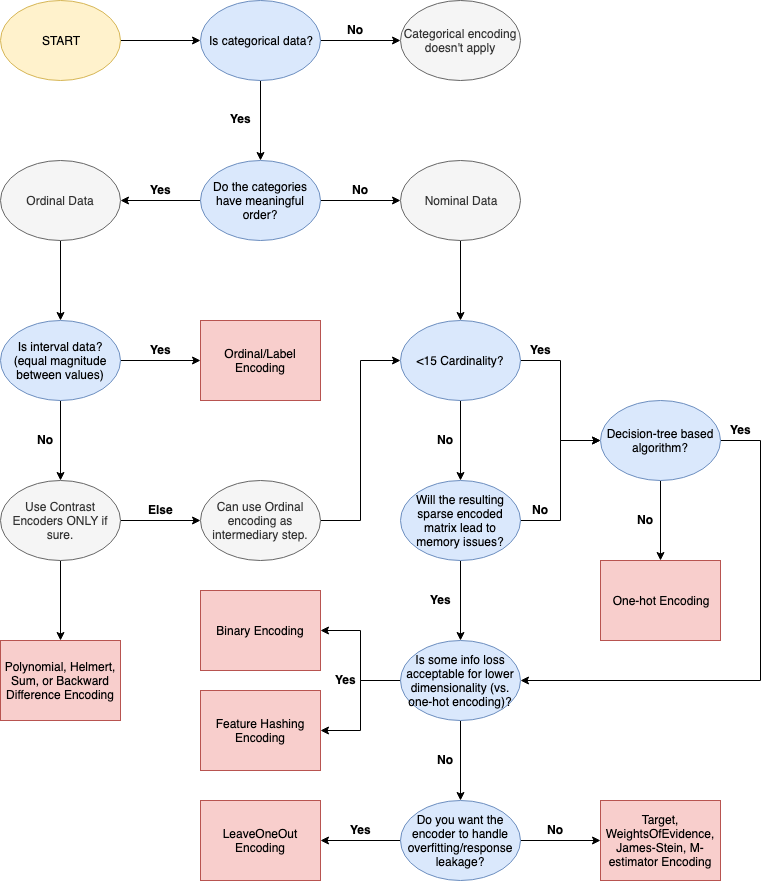

    Label Encoding or Ordinal Encoding
    One hot Encoding
    Dummy Encoding
    Effect Encoding
    Binary Encoding
    BaseN Encoding
    Hash Encoding
    Target Encoding

## Data Umbalanced 

https://github.com/DeepSparkChaker/machine-learning-imbalanced-data


https://www.kaggle.com/shahules/tackling-class-imbalance#3


https://www.kaggle.com/shahules/tackling-class-imbalance/notebook


https://epjohnson13.medium.com/tomek-links-smote-and-xgboost-for-fraud-detection-1fc8b5208e0d?source=social.linkedin


https://www.kdnuggets.com/2021/09/imbalanced-classification-without-re-balancing-data.html?fbclid=IwAR0ZS0t-obo3EHV6WLpdd8Tj-ggmHYF5eucmYT_h1khnlQ0uaQBz2PbAvW4

https://github.com/dataprofessor/machine-learning-for-imbalanced-data/blob/main/How_to_build_machine_learning_models_for_imbalanced_datasets.ipynb

**Resampling**

- Random Undersampling

'not minority' = resample all classes but the minority class

- Random Oversampling

"not majority" = resample all classes but the majority class
- Stratified Sampling

**Applying SMOTE**

        # This is the pipeline module we need for this from imblearn
        from imblearn.pipeline import Pipeline 

        # Define which resampling method and which ML model to use in the pipeline
        resampling = SMOTE(kind='borderline2')
        model = LogisticRegression ()   

        # Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
        pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

**Adjusting your algorithm weights**
- Model building with Class weight balancing

         RandomForestClassifier(random_state=42, class_weight='balanced') # Class weight balancing

         model = RandomForestClassifier(class_weight='balanced')

         model = RandomForestClassifier(class_weight='balanced_subsample')

         model = LogisticRegression(class_weight='balanced')

         model = SVC(kernel='linear', class_weight='balanced', probability=True)
         # Change the model options
        model = RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 12}}

         
        
**Ensemble methods**

- Are Robust 

- Avoid Overfitting 

- Improve Predictions Performance 

         from sklearn.ensemble import VotingClassifier
         
         clf1 = LogisticRegression(random_state=1)
         
         clf2 = RandomForestClassifier(random_state=1)
         
         clf3 = GaussianNB()
         
         ensemble_model = VotingClassifier(estimators=[('lr', clf1),('rf', clf2), ('gnb', clf3)], voting='hard')
         
         ensemble_model.fit(X_train, y_train)
         
         ensemble_model.predict(X_test)

         VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[2,1,1])   
         
**Clustering methods to detect Minority**

        # Import MiniBatchKmeans 
        from sklearn.cluster import MiniBatchKMeans

        # Split the data into training and test set
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

        # Define K-means model 
        kmeans = MiniBatchKMeans(n_clusters=3, random_state=42).fit(X_train)

        # Obtain predictions and calculate distance from cluster centroid
        X_test_clusters = kmeans.predict(X_test)
        X_test_clusters_centers = kmeans.cluster_centers_
        dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]

        # Create fraud predictions based on outliers on clusters 
        km_y_pred = np.array(dist)
        km_y_pred[dist >= np.percentile(dist, 95)] = 1
        km_y_pred[dist < np.percentile(dist, 95)] = 0
        
**Other clustering fraud detection methods**
explore using a density based clustering method (DBSCAN) to detect fraud. The advantage of DBSCAN is that you do not need to define the number of clusters beforehand. Also, DBSCAN can handle weirdly shaped data (i.e. non-convex) much better than K-means can. This time, you are not going to take the outliers of the clusters and use that for fraud, but take the smallest clusters in the data and label those as Minority .

        
    # Initialize and fit the DBSCAN model
    db = DBSCAN(eps=0.9, min_samples=10, n_jobs=-1).fit(X_scaled)

    # Obtain the predicted labels and calculate number of clusters
    pred_labels = db.labels_
    n_clusters = len(set(pred_labels)) - (1 if -1 in labels else 0)

    # Print performance metrics for DBSCAN
    print('Estimated number of clusters: %d' % n_clusters)
    print("Homogeneity: %0.3f" % homogeneity_score(labels, pred_labels))
    print("Silhouette Coefficient: %0.3f" % silhouette_score(X_scaled, pred_labels))


- you first need to figure out how big the clusters are, and filter out the smallest

- then, you're going to take the smallest ones and flag those as fraud
- last, you'll check with the original labels whether this does actually do a good job in detecting fraud.

        # Count observations in each cluster number
        counts = np.bincount(pred_labels[pred_labels >= 0])

        # Print the result
        print(counts)    
        
        # Create a dataframe of the predicted cluster numbers and fraud labels
            df = pd.DataFrame({'clusternr':pred_labels,'fraud':labels})

            # Create a condition flagging fraud for the smallest clusters 
            df['predicted_fraud'] = np.where((df['clusternr']==21) | (df['clusternr']==17) | (df['clusternr']==9), 1, 0)

            # Run a crosstab on the results 
            print(pd.crosstab(df['fraud'], df['predicted_fraud'], rownames=['Actual Fraud'], colnames=['Flagged Fraud']))
            
**Using text data**   
example : 

        # Find all cleaned emails that contain 'sell enron stock'
        mask = df['clean_content'].str.contains('sell enron stock', na=False)
         # Select the data from df using the mask
          print(df.loc[mask])
          
**Using list of terms**  

        # Create a list of terms to search for
        searchfor = ['enron stock', 'sell stock', 'stock bonus', 'sell enron stock']

        # Filter cleaned emails on searchfor list and select from df 
        filtered_emails = df.loc[df['clean_content'].str.contains('|'.join(searchfor), na=False)]
        print(filtered_emails)
**Creating a flag**

        # Create flag variable where the emails match the searchfor terms
        df['flag'] = np.where((df['clean_content'].str.contains('|'.join(searchfor)) == True), 1, 0)

        # Count the values of the flag variable
        count = df['flag'].value_counts()
        print(count)

**Topic modeling on Minority example fraud**  

    # Import the packages
    import gensim 
    from gensim import corpora 

    # Define the dictionary
    dictionary = corpora.Dictionary(text_clean)

    # Define the corpus 
    corpus = [dictionary.doc2bow(text) for text in text_clean]
    # Print corpus and dictionary
    print(corpus)
    print(dictionary)
    
    # Define the LDA model
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=5)

    # Save the topics and top 5 words
    topics = ldamodel.print_topics(num_words=5)

    # Print the results
    for topic in topics:
        print(topic)
**Flagging fraud based on topics**

    # Run get_topic_details function and check the results
    print(get_topic_details(ldamodel, corpus))
    # Add original text to topic details in a dataframe
    contents = pd.DataFrame({'Original text': text_clean})
    topic_details = pd.concat([get_topic_details(ldamodel, corpus), contents], axis=1)
    print(topic_details.head())
    # Add original text to topic details in a dataframe
    contents = pd.DataFrame({'Original text':text_clean})
    topic_details = pd.concat([get_topic_details(ldamodel, corpus), contents], axis=1)

    # Create flag for text highest associated with topic 3
    topic_details['flag'] = np.where((topic_details['Dominant_Topic'] == 3.0), 1, 0)
    print(topic_details.head())
    
**Threshold**

we can try using the original model (trained on the original “imbalanced” data set) and simply plot the trade-off between false positives and false negatives to choose a threshold that may produce a desirable business result.    
    

## Outlier Handling

**Statistical outlier removal**

While removing the top N% of your data is useful for ensuring that very spurious points are removed, it does have the disadvantage of always removing the same proportion of points, even if the data is correct. A commonly used alternative approach is to remove data that sits further than three standard deviations from the mean. You can implement this by first calculating the mean and standard deviation of the relevant column to find upper and lower bounds, and applying these bounds as a mask to the DataFrame. This method ensures that only data that is genuinely different from the rest is removed, and will remove fewer points if the data is close together. we can trim data like this :

        #train_std = train['cont1'].mean()
        #train_mean = train['cont1'].std()

        #cut_off = train_std * 3
        #train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

        # Trim the test DataFrame
        #trimmed_df = so_test_numeric[(train['cont1'] < train_upper) \
                                    # & (train['cont1'] > train_lower)]

    

# Feature Engineering

https://feature-engine.readthedocs.io/en/1.1.x/

Feature engineering is the act of taking raw data and extracting features from it that are suitable for tasks like machine learning. Most machine learning algorithms work with tabular data. When we talk about features, we are referring to the information stored in the columns of these tables 
**Binning**
While working with numeric data we come across some features where distributions of variables are skewed in the sense that some sets of values will occur a lot and some will be very rare. Directly using this type of feature may cause issues or can give inaccurate results.

Binning is a way to convert numerical continuous variables into discrete variables by categorizing them on the basis of the range of values of the column in which they fall. In this type of transformation, we create bins. Each bin allows a specific range of continuous numerical values. It prevents overfitting and increases the robustness of the model.

Let’s understand this using an example. We have scores of 10 students as 35, 46, 89, 20, 58, 99, 74, 60, 18, 81. Our task is to make 3 teams. Team 1 will have students with scores between 1-40, Team 2 will have students with scores between 41-80, and Team 3 will have students with scores between 81-100.

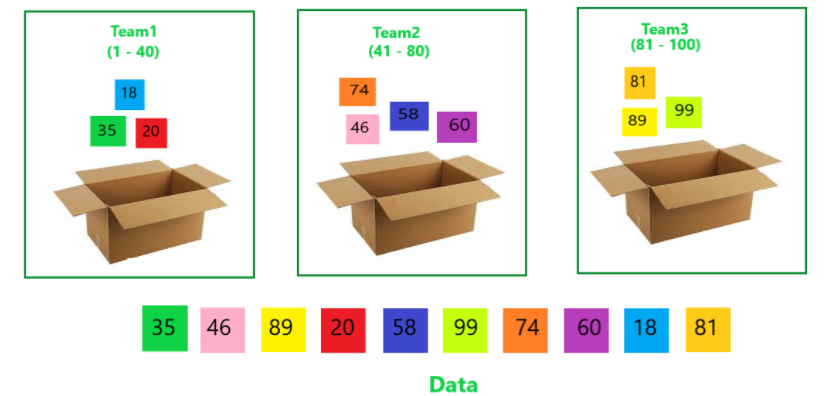

Binning can be done in different ways listed below.

      Fixed – Width Binning
      Quantile Binning
      Binning by Instinct
      
the formula is:
K = 1 + 3. 322*logN

where:
K = number of class intervals (bins).
N = number of observations in the set.
log = logarithm of the number.
Also we have : 


 **Sparse Interactions/Kmeans Features/Polynominal  Features**

In [ ]:
Feature engineering and feature selection is an iterative process that starts with engineering new features, training a model, and then testing the model predictions against the target labels. The goal is to determine which features improve the model’s prediction accuracy. You repeat this process, along with hyperparameter tuning, until you are satisfied with the model’s accuracy. 

In [ ]:
train=reduce_mem_usage(train)
test=reduce_mem_usage(test)

# Target 

In [ ]:
y=train['claim']

# Add bin data 

In [ ]:
num_features= train.drop(['id','claim'], axis=1).columns
cat_features = [w.replace('f', 'c') for w in num_features]
num_features

In [ ]:

# n_bins_rule=K = 1 + 3.322 np.log(train.shape[0])
# create the discretizer object with strategy quantile and 1000 bins
discretizer = KBinsDiscretizer(n_bins=1500, encode='ordinal',strategy='uniform')

pipeline = Pipeline([
        ('imputer', SimpleImputer( strategy='median')),
        ('bin', discretizer)
    ])
# fit the discretizer to the train set
pipeline.fit(train.loc[:,num_features])

# apply the discretisation
train2 = pipeline.transform(train.loc[:,num_features])

test2 = pipeline.transform(test.loc[:,num_features])



In [ ]:
train2_df=pd.DataFrame(train2,columns=cat_features).astype('category')
test2_df=pd.DataFrame(test2,columns=cat_features).astype('category')
# Apply the mask to create a reduced dataframe
train2_df_red =train2_df.iloc[:, [ 2, 9, 10, 21, 23, 45, 52, 69, 91, 95, 96, 103]]
test2_df_red=test2_df.iloc[:, [ 2, 9, 10, 21, 23, 45, 52, 69, 91, 95, 96, 103]]
print("Dimensionality reduced from {} to {}.".format(train2_df.shape[1], train2_df_red.shape[1]))
x_final= pd.concat( [train.loc[:,num_features], train2_df_red], axis=1) 
x_test_final= pd.concat( [test.loc[:,num_features], test2_df_red], axis=1) 

In [ ]:
x_final.dtypes

In [ ]:
del train
del train2_df
del test 
del test2_df 
del train2_df_red
del test2_df_red

# Cast Dtype

In [ ]:
x_final[x_final.select_dtypes(['float64']).columns] = x_final[x_final.select_dtypes(['float64']).columns].apply(pd.to_numeric)
x_final[x_final.select_dtypes(['object']).columns] = x_final.select_dtypes(['object']).apply(lambda x: x.astype('category'))
x_test_final[x_test_final.select_dtypes(['float64']).columns] = x_test_final[x_test_final.select_dtypes(['float64']).columns].apply(pd.to_numeric)
x_test_final[x_test_final.select_dtypes(['object']).columns] = x_test_final.select_dtypes(['object']).apply(lambda x: x.astype('category'))

##  What should we do for each colmun
### Separate features by dtype

Next we’ll separate the features in the dataframe by their datatype. There are a few different ways to achieve this. I’ve used the select_dtypes() function to obtain specific data types by passing in np.number to obtain the numeric data and exclude=['np.number'] to return the categorical data. Appending .columns to the end returns an Index list containing the column names. For the categorical features, we don’t want to include the target income column, so I’ve dropped that.
### Cat Features

In [ ]:
# select non-numeric columns
cat_columns = x_final.select_dtypes(include=['object','category']).columns
cat_columns

### Num Features

In [ ]:
# select the float columns
num_columns = x_final.select_dtypes(exclude=['object','category']).columns
num_columns

In [ ]:
all_columns = list(num_columns) + list(cat_columns)
print(cat_columns)
print(num_columns)
print(all_columns)

## check that we have all column

In [ ]:
if set(all_columns) == set(x_final.columns):
    print('Ok')
else:
    # Let's see the difference 
    print('dans all_columns mais pas dans train  :', set(all_columns) - set(x_final.columns))
    print('dans X.columns   mais pas dans all_columns :', set(train.columns) - set(all_columns))

# Features selection : 
**Feature Selection**

Feature selection is a method of selecting features from your feature set to be used for modeling. It draws from a set of existing features, so it's different than feature engineering because it doesn't create new features. The overarching goal of feature selection is to improve your model's performance. Perhaps your existing feature set is much too large, or some of the features you're working with are unnecessary. There are different ways you can perform feature selection. It's possible to do it in an automated way. Scikit-learn has several methods for automated feature selection, such as choosing a variance threshold and using univariate statistical tests

**Why reduce dimensionality?**

Your dataset will become simpler and thus easier to work with, require less disk space to store and computations will run faster. In addition, models are less likely to overfit on a dataset with fewer dimensions.

**Selection vs extraction**

When we apply feature selection, we completely remove a feature and the information it holds from the dataset. We try to minimize the information loss by only removing features that are irrelevant or hold little unique information, but this is not always possible.

Compared to feature selection, feature extraction is a completely different approach but with the same goal of reducing dimensionality. Instead of selecting a subset of features from our initial dataset, we'll be calculating, or extracting, new features from the original ones. These new features have as little redundant information in them as possible and are therefore fewer in number. One downside is that the newly created features are often less intuitive to understand than the original ones. 
PCA Calculating 

**Principal Components**

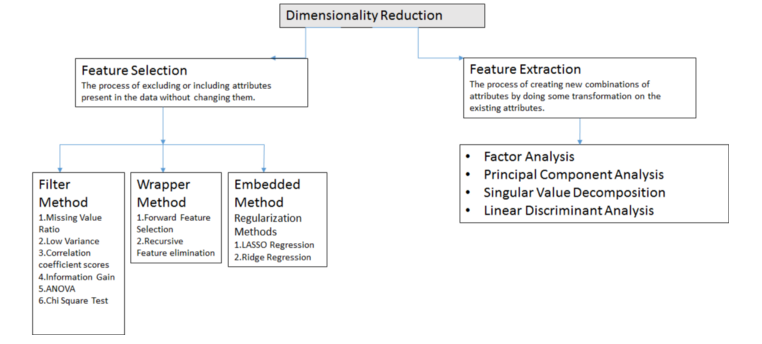

This is done in this notebook :

https://sebastianraschka.com/faq/docs/feature_sele_categories.html

https://github.com/DeepSparkChaker/CRISPDM_ULTIME/blob/main/CRISPDM_3__Dimensionality-Reduction.ipynb

https://www.kaggle.com/bannourchaker/1-featuresengineer-selectionpart1?scriptVersionId=72906910


https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

https://www.kaggle.com/lucamassaron/tutorial-feature-selection-with-boruta-shap

**Feature Selection Methods**

1. Uni-variate Selection

        Select K best

        Select percentile

        Generic Uni-variate select

        Pearson Correlation
        
         x : 
        # Create a feature selector with chi2 that picks one feature
        sk = SelectKBest(chi2, k=1)

        # Use the selector to pick between credit_amount and diff
        sk.fit(credit[['credit_amount', 'diff']], credit['class'])

        # Inspect the results
        sk.get_support()# Create a feature selector with chi2 that picks one feature
        sk = SelectKBest(chi2, k=1)

        # Use the selector to pick between credit_amount and diff
        sk.fit(credit[['credit_amount', 'diff']], credit['class'])

        # Inspect the results
        sk.get_support()

2. Selecting from Model
**Feature removing Methods**

    Low variance method

    Recursive method
    
    Manual Recursive Feature Elimination


3. Wrapper/RFE 
        
        rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=100, step=10, verbose=5)
        rfe_selector.fit(X_norm, y)
        rfe_support = rfe_selector.get_support()
        rfe_feature = X.loc[:,rfe_support].columns.tolist()
        print(str(len(rfe_feature)), 'selected features')
        
- Embeded

        from sklearn.feature_selection import SelectFromModel
        from sklearn.ensemble import RandomForestClassifier
        embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='1.25*median')
        embeded_rf_selector.fit(X, y)  
        embeded_rf_support = embeded_rf_selector.get_support()
        embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
        print(str(len(embeded_rf_feature)), 'selected features')
 
 
 
        from sklearn.feature_selection import RFE
        from sklearn.linear_model import LinearRegression,LogisticRegression
        # Create the RFE with a LogisticRegression estimator and 10 features to select
        rfe_LR = RFE(estimator=LogisticRegression(), n_features_to_select = 4, verbose=1)
        # Fits the eliminator to the data
        rfe_LR.fit(X[num_columns], y)

        # Print the features and their ranking (high = dropped early on)
        print(dict(zip(X[num_columns].columns, rfe_LR.ranking_)))
        mask_LR=rfe_LR.support_
        # Print the features that are not eliminated
        print(X[num_columns].columns[mask_LR])

        # Calculates the test set accuracy
        acc = accuracy_score(y, rfe_LR.predict(X[num_columns]))
        print("{0:.1%} accuracy on test set.".format(acc))
        
        # Wrap the feature eliminator around the random forest model
        rfe_RFC = RFE(estimator=RandomForestClassifier(), n_features_to_select=4, verbose=1)

        # Fits the eliminator to the data
        rfe_RFC.fit(X[num_columns], y)

        # Create a mask using an attribute of rfe
        mask_RFC = rfe_RFC.support_

        # Apply the mask to the feature dataset X and print the result
        reduced_num_X = X[num_columns].loc[:,mask_RFC]
        print(reduced_num_X.columns)
        # Calculates the test set accuracy
        acc = accuracy_score(y, rfe_RFC.predict(X[num_columns]))
         print("{0:.1%} accuracy on test set.".format(acc)
         
- Sum the votes of the three models  
 
            # Sum the votes of the three models
            votes = np.sum([mask_LR, mask_RFC, gb_mask], axis=0)

            # Create a mask for features selected by all 3 models
            meta_mask = votes >= 3

            # Apply the dimensionality reduction on X
            X_reduced = X[num_columns].loc[:, meta_mask]
            print(X[num_columns].columns)
            print(X_reduced.columns)
            
            
            

            temp1=set(X[num_columns].columns)
            s=set(X_reduced.columns)
            temp3 = [x for x in temp1 if x not in s]
            print("list to drop {}".format(temp3))
- PCA
              
        from sklearn.decomposition import PCA
        # Create the scaler and standardize the data
        scaler = StandardScaler()
        diabetes_std = scaler.fit_transform(X)
        # Create the PCA instance and fit and transform the data with pca
        pca = PCA()
        pc = pca.fit_transform(diabetes_std)

        # This changes the numpy array output back to a dataframe
        pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4','PC 5', 'PC 6', 'PC 7', 'PC 8'])
        pc_df.columns.values
        
         Inspect the explained variance ratio per component
         print(pca.explained_variance_ratio_)
         

        # Plot the explained variances
        features = range(pca.n_components_)
        plt.bar(features,pca.explained_variance_)
        plt.xlabel('PCA feature')
        plt.ylabel('variance')
        plt.xticks(features)
        plt.show()
        
        # Build the pipeline
        # Pipe a scaler to PCA selecting 80% of the variance
        pipe = Pipeline([
                ('scaler', StandardScaler()),
                ('reducer', PCA(n_components=0.9)),
                ('classifier', RandomForestClassifier(random_state=0))])

        # Fit the pipeline to the training data
        pipe.fit(X_train, y_train)

        # Score the accuracy on the test set
        accuracy = pipe.score(X_test, y_test)

        # Prints the explained variance ratio and accuracy
        print(pipe.steps[1][1].explained_variance_ratio_)
        print('{0:.1%} test set accuracy'.format(accuracy))
        
        
        
        
        
        
        
        
        
        
        
        

In [ ]:
skew_features =['f10', 'f104', 'f92', 'f96', 'f53', 'f3', 'f26', 'f116', 'f51', 'f32',
       'f21', 'f112', 'f114', 'f73', 'f74', 'f83', 'f69', 'f33', 'f103', 'f62',
       'f115', 'f4', 'f36', 'f99', 'f38', 'f64', 'f41', 'f16', 'f77', 'f84',
       'f20', 'f44', 'f63', 'f39', 'f71', 'f52', 'f106', 'f118', 'f87', 'f68',
       'f89', 'f9', 'f78', 'f102', 'f82', 'f30', 'f18', 'f101', 'f8', 'f14',
       'f35', 'f27', 'f111', 'f95', 'f45', 'f107', 'f98', 'f59', 'f66', 'f94',
       'f23', 'f2', 'f13', 'f110', 'f58', 'f91', 'f46']

kurtosis_features=['f3', 'f6', 'f10', 'f17', 'f21', 'f22', 'f26', 'f32', 'f36', 'f43',
       'f46', 'f51', 'f53', 'f69', 'f76', 'f92', 'f96', 'f104', 'f114', 'f115',
       'f116']
outlier_and_skewed_features=[x for x in kurtosis_features if x in  skew_features]
outlier_and_skewed_features

In [ ]:
x_final.shape

In [ ]:
x_final.var().sort_values( ascending=True)

In [ ]:
# instantiate VarianceThreshold object
vt = VarianceThreshold(threshold=0.000001)
# fit vt to data
vt.fit(x_final)
# get the indices of the features that are being kept
feature_indices = vt.get_support(indices=True)
feature_indices

In [ ]:
selector = SelectPercentile(mutual_info_classif, percentile=80)
#X=SimpleImputer().fit_transform(x_final)
#selector.fit(X, y)
#indices =selector.get_support(True)
#indices
precentile80= [  0,   1,   2,   3,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  51,  53,  54,  56,  57,  58,  60,
        62,  64,  65,  66,  69,  70,  72,  73,  74,  75,  76,  78,  79,
        80,  81,  82,  85,  86,  87,  89,  90,  91,  92,  93,  95,  96,
        97, 101, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 122, 123, 124, 125, 126, 127, 128, 129]
# Apply the mask to create a reduced dataframe
reduced_df =x_final.iloc[:, precentile80]
print("Dimensionality reduced from {} to {}.".format(x_final.shape[1], reduced_df.shape[1]))

In [ ]:
# Apply the mask to create a reduced dataframe
percentile90=[  0,   1,   2,   5,   6,   7,   9,  10,  11,  13,  14,  15,  16,
        17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  33,  34,  35,  36,  37,  39,  40,  41,  42,  43,  44,
        45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
        58,  59,  60,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  85,
        86,  88,  89,  90,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 123, 124, 125, 126, 127, 128, 129]
reduced_df2 = x_final.iloc[:, percentile90]
print("Dimensionality reduced from {} to {}.".format(x_final.shape[1], reduced_df2.shape[1]))

In [ ]:
#from collections import Counter
#l3 =l1+l2+l3
#listfinal1=[ key  for key , value in   Counter(l3).items() if value >=2]

#print(len(listfinal1))
#print(listfinal1)

<a id=4></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Modeling :Find Best Pipe</center></h3>

how to desing correctly CV :
cv vs timeseries cross validation vs groupcv vs timeseries groupcv .
https://www.kaggle.com/jorijnsmit/found-the-holy-grail-grouptimeseriessplit

https://www.kaggle.com/yamqwe/purgedgrouptimeseries-cv-with-extra-data-nn

https://stackoverflow.com/questions/51963713/cross-validation-for-grouped-time-series-panel-data


**Steps for K-fold cross-validation**

    Split the dataset into K equal partitions (or "folds")
        So if k = 5 and dataset has 150 observations
        Each of the 5 folds would have 30 observations
    Use fold 1 as the testing set and the union of the other folds as the training set
        Testing set = 30 observations (fold 1)
        Training set = 120 observations (folds 2-5)
    Calculate testing accuracy
    Repeat steps 2 and 3 K times, using a different fold as the testing set each time
        We will repeat the process 5 times
        2nd iteration
            fold 2 would be the testing set
            union of fold 1, 3, 4, and 5 would be the training set
        3rd iteration
            fold 3 would be the testing set
            union of fold 1, 2, 4, and 5 would be the training set
        And so on...
    Use the average testing accuracy as the estimate of out-of-sample accuracy

Diagram of 5-fold cross-validation

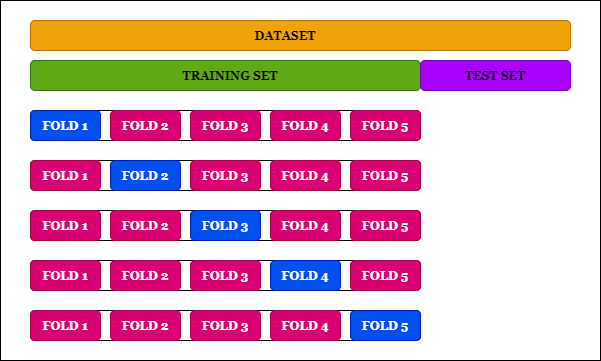





**Comparing cross-validation to train/test split**

Advantages of cross-validation:

    More accurate estimate of out-of-sample accuracy
    More "efficient" use of data
        This is because every observation is used for both training and testing

Advantages of train/test split:

    Runs K times faster than K-fold cross-validation
        This is because K-fold cross-validation repeats the train/test split K-times
    Simpler to examine the detailed results of the testing process

**Cross-validation recommendations**

    K can be any number, but K=10 is generally recommended
        This has been shown experimentally to produce the best out-of-sample estimate
    For classification problems, stratified sampling is recommended for creating the folds
        Each response class should be represented with equal proportions in each of the K folds
            If dataset has 2 response classes
                Spam/Ham
                20% observation = ham
                Each cross-validation fold should consist of exactly 20% ham
        scikit-learn's cross_val_score function does this by default


Cross-Validation in Deep Learning

Cross-validation in Deep Learning (DL) might be a little tricky because most of the CV techniques require training the model at least a couple of times.

In deep learning, you would normally tempt to avoid CV because of the cost associated with training k different models. Instead of doing k-Fold or other CV technique, you might use a random subset of your training data as a hold-out for validation purposes.

For example, Keras deep learning library allows you to pass one of two parameters for the fit function that performs training.

validation_split: percentage of the data that should be held out for validation
validation_data: a tuple of (X, y) which should be used for validation. This parameter overrides the validation_split parameter which means you can use only one of these parameters at once.

The same approach is used in official tutorials of other DL frameworks such as PyTorch and MxNet. They also suggest splitting the dataset into three parts: training, validation, and testing.

Training – a part of the dataset to train on
Validation – a part of the dataset to validate on while training
Testing – a part of the dataset for final validation of the model

Still, you can use cross-validation in DL tasks if the dataset is tiny (contains hundreds of samples). In this case, learning a complex model might be an irrelevant task so make sure that you don’t complicate the task further.

**How to choose the best k for cross validation **:

Note:

Large K value in leave one out cross-validation would result in over-fitting. Small K value in leave one out cross-validation would result in under-fitting.

If the training set is relatively small, would it be better to use a lower k?

No, it's the opposite. If the training set is small, it is better to use a larger k. This simulates having a larger training set. In the extreme case you get leave-one-out cross-validation: train on all but one of the samples, and test on that sample. Repeat for each sample.

The choice of k involves a tradeoff between efficiency and the accuracy of the error prediction. More folds reduce the bias of the estimate of the generalization error, but they take more time to compute.

Depends on how much CPU juice you are willing to afford for the same. Having a lower K means less variance and thus, more bias, while having a higher K means more variance and thus, and lower bias.

Also, one should keep in mind the computational costs for the different values. High K means more folds, thus higher computational time and vice versa. So, one needs to find a sweet spot between those by doing a hyper tuning analysis.

Also, you need to keep the size of your data in mind. If your data is very less, then even using a k-fold crossval wouldn't make sense. So, you might want to use a leave-one-out CV (LOOCV). 


**Feature engineering and selection within cross-validation iterations**

    Normally, feature engineering and selection occurs before cross-validation
    Instead, perform all feature engineering and selection within each cross-validation iteration
    More reliable estimate of out-of-sample performance since it better mimics the application of the model to out-of-sample data
      

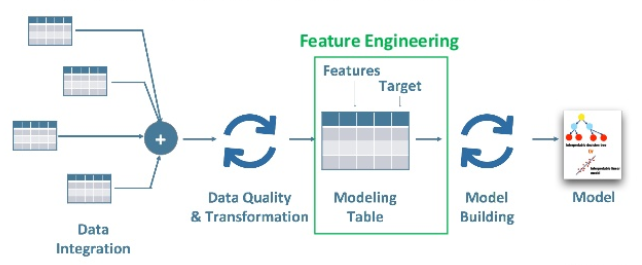

# Train 
## Define Baseline  Preprocess: 
It is always better to start with a simple model in every Machine Learning problem. Then we can apply different methods to increase the score and make a more robust model. This notebook aims to make a baseline model and make my first submission in this competition.

**complete preprocessor pipe**

## Modeling and project structure: 
**1-configs:** in configs we define every single thing that can be configurable and can be changed in the future. Good examples are training hyperparameters, folder paths, the model architecture, metrics, flags.

**2-dataloader:** is quite self-explanatory. All the data loading and data preprocessing classes and functions live here.
evaluation is a collection of code that aims to evaluate the performance and accuracy of our model.

**3-executor:** in this folder, we usually have all the functions and scripts that train the model or use it to predict something in different environments. And by different environments I mean: executors for GPUs, executors for distributed systems. This package is our connection with the outer world and it’s what our “main.py” will use.

**4-model** contains the actual deep learning/ML code (we talk about tensorflow, pytorch etc)

**5-notebooks** include all of our jupyter/colab notebooks in one place.

**6-ops:** this one is not always needed, as it includes operations not related with machine learning such as algebraic transformations, image manipulation techniques or maybe graph operations.

**7-utils:** utilities functions that are used in more than one places and everything that don’t fall in on the above come here.

Now that we have our project well structured and all, we can begin to see how our code should look like on a lower level.
### Set Up:
let's complete to follow this link : 

https://www.kaggle.com/bannourchaker/crsipdm-guide-hgbc-speed-cv-parallelism/notebook

https://www.kaggle.com/bannourchaker/crisdm-ventilator-oop-lgbm-regression/edit

# Best pipe for nlp : 

https://www.kaggle.com/sermakarevich/sklearn-pipelines-tutorial

# Pipeline : 

https://github.com/DeepSparkChaker/CRISPDM_ULTIME/blob/main/CRISPDM_4__designing-machine-learning-workflows-in-python.ipynb

https://www.kaggle.com/bannourchaker/2-crispdm-process-pipelikepro

https://www.kaggle.com/bannourchaker/4-featureengineer-featuresselectionpart4

https://www.kaggle.com/bannourchaker/1-featuresengineer-selectionpart1/edit/run/73339308

https://www.kaggle.com/bannourchaker/3-featureengineer-featuresselectionpart3

# Select best preprocess Pipeline : 
https://www.kaggle.com/bannourchaker/1-2eda-selectbestpreprocespipedataxgbr

# Select Best model : 
https://github.com/DeepSparkChaker/CRISPDM_ULTIME/blob/main/Workflow_Ultime_2_(code).ipynb

https://www.kaggle.com/bannourchaker/pro-pipe1-select-thebestmodels

# Hyper param tuning : 

https://www.kaggle.com/bannourchaker/optuna-lgbmr

https://www.kaggle.com/bannourchaker/5-tuning-using-pipelines-optuna-ramdomsearch

https://github.com/solegalli/optuna-examples

https://aetperf.github.io/2021/02/16/Optuna-+-XGBoost-on-a-tabular-dataset.html

https://www.kaggle.com/bannourchaker/5-tuning-using-pipelines-optuna-ramdomsearch

https://www.kaggle.com/bannourchaker/optuna-lgbmr

https://github.com/solegalli/optuna-examples

# Data Centric Appproch : 
https://www.kaggle.com/bannourchaker/6-datacentricapprochfinal

# Ensemble :

https://www.kaggle.com/bannourchaker/7ensembling-stacking-averaging-scratchvssklearn

https://www.kaggle.com/bannourchaker/stacking-ventilator/edit/run/78480942

https://www.kaggle.com/bannourchaker/averagingmodels

https://www.analyticsvidhya.com/blog/2021/08/ensemble-stacking-for-machine-learning-and-deep-learning/

https://www.kaggle.com/bannourchaker/pro-pipe2-selectbestpreporcesspipeensemble

belendig: 

https://www.kaggle.com/bannourchaker/8-ensembling-blending-scratchvsoop

https://www.kaggle.com/bannourchaker/blending-ventilator

https://www.kaggle.com/bannourchaker/blending


# Auto Ml : 
https://github.com/DeepSparkChaker/CRISPDM_ULTIME/blob/main/Workflow_Ultime_3_AutoML.ipynb
# Binary Classifcation/small data /complete crisddm examples  : 
https://github.com/DeepSparkChaker/Credit_Risk_Small_Data_SyntheticSamples_EnsembleMethods

https://github.com/DeepSparkChaker/Income_Prediction

https://github.com/DeepSparkChaker/Credit_Risk_Small_Data_SyntheticSamples_EnsembleMethods/blob/main/Assignment_Udemy.ipynb

https://github.com/DeepSparkChaker/Credit_Risk_Small_Data_SyntheticSamples_EnsembleMethods/blob/main/Swis_assign_model_Classification.ipynb

https://github.com/DeepSparkChaker/CRISPDM_ULTIME

#  credit risk Analysis : 
https://github.com/DeepSparkChaker/Credit_Risk_Small_Data_SyntheticSamples_EnsembleMethods/blob/main/Credit_Risk_Anaysis%20.ipynb

Deploy:

https://towardsdatascience.com/from-jupyter-notebook-to-deployment-a-straightforward-example-1838c203a437

 https://github.com/DeepSparkChaker/Titanic_Deep_Spark/blob/main/app.py
https://github.com/Kunal-Varma/Deployment-of-ML-model-using-FASTAPI/tree/2cc0319abbec469010a5139f460004f2a75a7482
https://realpython.com/fastapi-python-web-apis/
 https://github.com/tiangolo/fastapi/issues/3373
 https://www.freecodecamp.org/news/data-science-and-machine-learning-project-house-prices/
https://github.com/tiangolo/fastapi/issues/1616
https://stackoverflow.com/questions/68244582/display-dataframe-as-fastapi-output
https://www.kaggle.com/sakshigoyal7/credit-card-customers
https://github.com/renanmouraf/data-science-house-prices    
https://towardsdatascience.com/data-science-quick-tips-012-creating-a-machine-learning-inference-api-with-fastapi-bb6bcd0e6b01
https://towardsdatascience.com/how-to-build-and-deploy-a-machine-learning-model-with-fastapi-64c505213857
https://analyticsindiamag.com/complete-hands-on-guide-to-fastapi-with-machine-learning-deployment/

https://github.com/shaz13/katana/blob/develop/Dockerfile


https://github.com/TripathiAshutosh/FastAPI/blob/main/main.py

Best practices : 
    
https://theaisummer.com/best-practices-deep-learning-code/    
https://github.com/The-AI-Summer/Deep-Learning-In-Production/tree/master/2.%20Writing%20Deep%20Learning%20code:%20Best%20Practises

 Docker :
 
 https://towardsdatascience.com/docker-in-pieces-353525ec39b0?fbclid=IwAR102sks2L0vRTde2qz1g4I4NhqXxnoqfV4IFzmZke4DvGcuiuYhj25eVSY
 
https://github.com/dkhundley/ds-quick-tips/blob/master/012_dockerizing_fastapi/Dockerfile


 Deploy + scaling :
https://towardsdatascience.com/deploying-ml-models-in-production-with-fastapi-and-celery-7063e539a5db
https://github.com/jonathanreadshaw/ServingMLFastCelery

https://github.com/trainindata/deploying-machine-learning-models/blob/aaeb3e65d0a58ad583289aaa39b089f11d06a4eb/section-04-research-and-development/07-feature-engineering-pipeline.ipynb

Ml OPS : 
https://www.linkedin.com/posts/vipulppatel_getting-started-with-mlops-21-page-tutorial-activity-6863895411837415424-dWMh/?fbclid=IwAR3Y4clbzujS_s2FFWg3tTYMKaGhh3vo25NUyoVdKHAJ7zynmCTNtzlHQ4M

https://towardsai.net/p/machine-learning/mlops-demystified?utm_source=twitter&utm_medium=social&utm_campaign=rop-content-recycle&fbclid=IwAR3MimsSXCFq3GqiLKoaQqXbeb3bkSwKhSkfQSKT_c1gsHDMGSBAv63s7Po
https://www.youtube.com/watch?v=9I8X-3HIErc

https://pub.towardsai.net/deployment-ml-ops-guide-series-2-69d4a13b0dcf

https://github.com/TripathiAshutosh/MLOps-IRIS

Data Scientist vs Ml Engineer :
https://neptune.ai/blog/ml-engineer-vs-data-scientist

Publish to medium : 

https://towardsai.net/p/data-science/how-to-publish-a-jupyter-notebook-as-a-medium-blogpost?utm_source=twitter&utm_medium=social&utm_campaign=rop-content-recycle&fbclid=IwAR2-an7kknO3bsI5xjRdjL3jiwuPy7MBN5lVBc6fzx15mGY2iLS5KndCYWc



### Final X and y  train / test:

In [ ]:
# select the float columns
cat_feautres = x_final.select_dtypes(include=['object','category']).columns
num_features = x_final.select_dtypes(exclude=['object','category']).columns
# Different Encoders 
encoders = {
    'BackwardDifferenceEncoder': ce.backward_difference.BackwardDifferenceEncoder,
    'BaseNEncoder': ce.basen.BaseNEncoder,
    'BinaryEncoder': ce.binary.BinaryEncoder,
    'CatBoostEncoder': ce.cat_boost.CatBoostEncoder,
    'HashingEncoder': ce.hashing.HashingEncoder,
    'HelmertEncoder': ce.helmert.HelmertEncoder,
    'JamesSteinEncoder': ce.james_stein.JamesSteinEncoder,
    'OneHotEncoder': ce.one_hot.OneHotEncoder,
    'LeaveOneOutEncoder': ce.leave_one_out.LeaveOneOutEncoder,
    'MEstimateEncoder': ce.m_estimate.MEstimateEncoder,
    'OrdinalEncoder': ce.ordinal.OrdinalEncoder,
    'PolynomialEncoder': ce.polynomial.PolynomialEncoder,
    'SumEncoder': ce.sum_coding.SumEncoder,
    'TargetEncoder': ce.target_encoder.TargetEncoder,
    'WOEEncoder': ce.woe.WOEEncoder
}
# Differents Scaler
Scalers={'StandardScaler': StandardScaler,
    'RobustScaler': RobustScaler,
    'MinMaxScaler': MinMaxScaler,
    'PowerTransformer': PowerTransformer,
    'QuantileTransformer': QuantileTransformer,
    'Normalizer': Normalizer,
    'MaxAbsScaler': MaxAbsScaler}
cat_feautres2=['c10', 'c11', 'c24']
#data_cleaning = make_column_transformer(
 #   ( OneHotEncoder(), colonnes_catégoriques ),
  #  ( fill_missing_then_one_hot_encoder , colonnes_catégoriques_avec_valeurs_manquantes),
   # ( SimpleImputer(strategy='mean'), colonnes_numériques_avec_valeurs_manquantes),
    #( CountVectorizer(), 'Name'),
    #( extraire_lettre_cabine, 'Cabin'),
    #( 'drop' , drop_colonnes),
    #( 'passthrough' , passthrough_colonnes)
cat_pipe = Pipeline([('selector', ColumnSelector(cat_feautres2)),
                    # ('imputer', SimpleImputer(strategy='constant', fill_value='missing',add_indicator=True)),
                     # ('reducer', SelectKBest(score_func=mutual_info_classif, k=10)),
                     ('Encoder', ce.cat_boost.CatBoostEncoder())
                    ])
#Define value pipeline
num_pipe = Pipeline([('selector', ColumnSelector(num_features)),
                     ('FeaturesEngineer',FeaturesEngineer()),
                     # ('outlier',OutlierReplace()),
                     ('imputer', SimpleImputer(strategy='median',add_indicator=True)),
                     ('scaler', QuantileTransformer()),
                     ('AddKmeans', MiniKmeansTransformer()),
                     #('reducedim',  SelectPercentile(score_func=mutual_info_classif,
                      #          percentile=98))
                     #('dim_red', SelectKBest(mutual_info_classif, k=120))
                    ])
#Featureunion fitting training data
preprocessor = FeatureUnion(transformer_list=[('cat', cat_pipe),
                                              ('num', num_pipe)])
# preprocessor.fit(X_train)
#############################
# Complete Pipe 
def create_pipeline(model, preprocessor):
    pipeline = Pipeline([
        ('pre', preprocessor),
        # ('dim_red', SelectPercentile(mutual_info_classif, percentile=99)),
        #('dim_red', PCA(0.80)),
        ('estimator', model)
    ])
    return pipeline

In [ ]:
from catboost import CatBoostClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

lgbm_params = {
    "learning_rate": 0.008,
    'device': 'gpu',
    'n_estimators': 3205,
    'num_leaves': 184,
    'min_child_samples': 63,
    'feature_fraction': 0.6864594334728974,
    'bagging_fraction': 0.9497327922401265,
    'bagging_freq': 1,
    'reg_alpha': 19,
    'reg_lambda': 19,
    'gpu_platform_id': 0
}
lgb_params2 = {    
    'lambda_l1': 0.022704072981852813, 
    'lambda_l2': 2.2042334091551092, 
    'num_leaves': 50, 
    'feature_fraction': 0.7804529492265749, 
    'bagging_fraction': 0.999619974011377, 
    'bagging_freq': 4, 
    'min_child_samples': 166,
    "objective": "binary",
    "metric": "binary_logloss",
    "boosting_type": "gbdt",
    "device_type" : "gpu"

}
model_lgbm2 = LGBMClassifier(
                        **lgb_params2,
                       random_state = 0
                      )
############################################
xgb_params3 = {
        'n_estimators': 16939, 
        'learning_rate': 0.1876042995729744, 
        'subsample': 0.9947704250490819, 
        'colsample_bytree': 0.714913373260802, 
        'max_depth': 1, 
        'min_child_weight': 300, 
        'reg_lambda': 2.520228860596293e-05, 
        'reg_alpha': 0.00045044167069949973,
        'tree_method': 'gpu_hist'
}
xgb_params2 = {
    'n_estimators' : 3800,
    'reg_lambda' : 3,
    'reg_alpha' : 26,
    'subsample' : 0.6000000000000001,
    'colsample_bytree' : 0.6000000000000001,
    'max_depth' : 9,
    'min_child_weight' : 5,
    'gamma' : 13.054739572819486,
    'learning_rate': 0.01,
    'tree_method': 'gpu_hist',
    'booster': 'gbtree'
}

xgb_params1 = {'max_depth': 6, 
    'colsample_bytree': 0.7098433872257219, 
    'min_child_weight': 482, 
    'subsample': 0.8406820875269025, 
    'reg_alpha': 3.2594867475105374, 
    'reg_lambda': 0.1534227221930378,
    'random_state': 666,
        'n_jobs' : -1,
        'n_estimators' : 40000,
        'learning_rate' : 0.005,
        'tree_method': "gpu_hist",
        'predictor' :"gpu_predictor",
        'gpu_id' : 0
}
model_xgb0 = XGBClassifier(
        max_depth=3,
        subsample=0.5,
        colsample_bytree=0.5,
        learning_rate= 0.01187431306013263,
        n_estimators= 10000,
        n_jobs=-1,
        use_label_encoder=False,
        objective='binary:logistic',
        tree_method='gpu_hist',  # Use GPU 
        gpu_id=0,
        predictor='gpu_predictor',
    )


model_xgb1 = XGBClassifier(
        objective='binary:logistic',
    **xgb_params1)
model_xgb2 = XGBClassifier(
        objective='binary:logistic',
    **xgb_params2)
model_xgb3 = XGBClassifier(
        objective='binary:logistic',
    **xgb_params3)

model_lgbm = LGBMClassifier(
                        **lgbm_params,
                       random_state = 0,
                         objective='binary',
                          metric = 'auc', 
                      )


# https://www.kaggle.com/mlanhenke/tps-09-optuna-study-catboostclassifier
best_params_cat = {
    'iterations': 15585, 
    'objective': 'CrossEntropy', 
    'bootstrap_type': 'Bernoulli', 
    'od_wait': 1144, 
    'learning_rate': 0.023575206684596582, 
    'reg_lambda': 36.30433203563295, 
    'random_strength': 43.75597655616195, 
    'depth': 7, 
    'min_data_in_leaf': 11, 
    'leaf_estimation_iterations': 1, 
    'subsample': 0.8227911142845009,
    'task_type' : 'GPU',
    'devices' : '0',
    'verbose' : 0
}
cat_params2 = {
        'iterations': 5834, 
        'objective': 'Logloss', 
        'bootstrap_type': 'Bayesian', 
        'od_wait': 1491, 
        'learning_rate': 0.07733510576652604, 
        'reg_lambda': 6.067283648607877, 
        'random_strength': 19.03761597798964, 
        'depth': 4, 
        'min_data_in_leaf': 17, 
        'leaf_estimation_iterations': 8, 
        'bagging_temperature': 0.7761781866167776,
        'task_type' : 'GPU'
}
paramsHGBC={'l2_regularization': 2.311620342927431,
            
 'early_stopping': 'False',
 'learning_rate': 0.0775102184223046,
 'max_iter': 1000,
 'max_depth': 29,
 'max_bins': 141,
 'min_samples_leaf': 4707,
 'max_leaf_nodes': 28}
model_HGBC = HistGradientBoostingClassifier(**paramsHGBC)
model_cat = CatBoostClassifier(**best_params_cat)
model_cat2 = CatBoostClassifier(**cat_params2)
model_LR=LogisticRegression(solver='sag',n_jobs=-1)
model_NB=GaussianNB()
model_svc = svm.SVC(kernel='rbf')
model_RF= RandomForestClassifier(n_estimators=4500, min_samples_leaf=20,n_jobs=-1) 
pipeline_model_lgbm = create_pipeline(model_lgbm,preprocessor)
pipeline_model_lgbm2 = create_pipeline(model_lgbm2,preprocessor)
pipeline_model_xgb0 = create_pipeline(model_xgb0,preprocessor)
pipeline_model_xgb1 = create_pipeline(model_xgb1,preprocessor)
pipeline_model_xgb2 = create_pipeline(model_xgb2,preprocessor)
pipeline_model_xgb3 = create_pipeline(model_xgb3,preprocessor)
pipeline_model_cat= create_pipeline(model_cat,preprocessor)
pipeline_model_cat2= create_pipeline(model_cat2,preprocessor)
pipeline_model_HGBC = create_pipeline(model_HGBC,preprocessor)
pipeline_model_LR= create_pipeline(model_LR,preprocessor)
pipeline_model_RF= create_pipeline(model_RF,preprocessor)
pipeline_model_NB= create_pipeline(model_NB,preprocessor)
pipeline_model_svc= create_pipeline(model_svc,preprocessor)

pipeline_model_HGBC

list final 2 :

lgbm witgh features reduction 
Fold 0 | AUC: 0.7675612215465444
Fold 1 | AUC: 0.7662376496404056


LR : 
Overall mean auc : 0.7626922046647566

Naive bayes :
      AUC: 0.7602168894425947
      

RF 
AUC: 0.7577456695319655

All data availble 
RF 
Fold 0 | AUC: 0.7972343992218189
 
LR = 0.8 

      
      

Imputers  = { 'SimpleImputer_mean':SimpleImputer(strategy='mean',add_indicator=True)
             
            #'SimpleImputer_median': SimpleImputer(strategy='median',add_indicator=True)
            }

+Scalers={
    #'StandardScaler': StandardScaler(), 
         # 'RobustScaler': RobustScaler(),
'PowerTransformer': PowerTransformer(),
'QuantileTransformer_uniform': QuantileTransformer(output_distribution='uniform'),
#'QuantileTransformer_normal': QuantileTransformer(output_distribution='normal'),
     'Normalizer': Nor
}
Selectors={
    #'f_classif': f_classif,
                    'mutual_info_classif': mutual_info_classif}

BestfeaturesPercentile={
    #'50features': 50,QuantileTransformer_normal,Normalizer
                    '75features': 85,
                   '90features': 95
}

#X1=X[0:100].copy()
#y1=y[0:100].copy()

df_resultsLogisticRegression = pd.DataFrame(columns=['imputer', 'scaler','Selector', 'Percentnumoffeatures', 'auc'])
for num in BestfeaturesPercentile.values():
    for scaler in Scalers.values(): 
        for imputer in Imputers.values(): 
            for Selector  in Selectors.values():
                try :
                    #numeric_transformer = Pipeline(
                     #   steps=[
                      #      ('imputer', imputer),
                       #     ('scaler', scaler)#(Numerical Input, Numerical Output)
                       # ])

                   # preprocessor = ColumnTransformer(
                   #     transformers=[
                    #        ('numerical', numeric_transformer, num_columns),
                     #       ('categorical', categorical_transformer, cat_columns)
                      #  ]
                    #)

                    pipe_LogisticRegression = Pipeline(
                        steps=[
                   # ('preprocessor', numeric_transformer),
                    ('imputer', imputer),
                    ('scaler', scaler),
                    ('reducedim',  SelectPercentile(score_func=Selector,
                                                    percentile=num)),
                   # ('classifier', LogisticRegression(solver='sag',n_jobs=-1)),
                    ('classifier', model)
                      #('classifier', GaussianNB(n_jobs=-1))      
                        ]
                    )
                    #rmse =cross_val_score(pipe_LGBMReg, X, y, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
                    pipe_LogisticRegression.fit(X, y)
                    y_pred = pipe_LogisticRegression.predict_proba(X)[:,1]
                    auc1 = roc_auc_score(y_true=y, y_score=y_pred)
                    row = {
                        'imputer': imputer,
                        'scaler': scaler,
                        'Selector': Selector, 
                        'Percentnumoffeatures': num,
                        'auc': auc1
                    }
                    df_resultsLogisticRegression = df_resultsLogisticRegression.append(row, ignore_index=True)
                    df_resultsLogisticRegression.to_csv('firstmodelLR.csv',index=False)               
                    print(row)
                except :
                    row = {
                        'imputer': imputer,
                        'scaler': scaler,
                        'Selector': Selector, 
                        'Percentnumoffeatures': num,
                        'auc': auc1
                    }
                    df_resultsLogisticRegression = df_resultsLogisticRegression.append(row, ignore_index=True)
                    
df_resultsLogisticRegression.sort_values(by='auc',ascending=False).tail(50)                 


     LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.9497327922401265, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9497327922401265
[LightGBM] [Warning] feature_fraction is set=0.6864594334728974, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6864594334728974
{'imputer': SimpleImputer(add_indicator=True), 'scaler': RobustScaler(), 'Selector': <function mutual_info_classif at 0x7fab6a5f4050>, 'Percentnumoffeatures': 75, 'auc': 0.8784589083219664}
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.9497327922401265, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9497327922401265
[LightGBM] [Warning] feature_fraction is set=0.6864594334728974, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6864594334728974
{'imputer': SimpleImputer(add_indicator=True, strategy='median'), 'scaler': RobustScaler(), 'Selector': <function mutual_info_classif at 0x7fab6a5f4050>, 'Percentnumoffeatures': 75, 'auc': 0.8783842996761909}
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.9497327922401265, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9497327922401265
[LightGBM] [Warning] feature_fraction is set=0.6864594334728974, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6864594334728974
{'imputer': SimpleImputer(add_indicator=True), 'scaler': QuantileTransformer(), 'Selector': <function mutual_info_classif at 0x7fab6a5f4050>, 'Percentnumoffeatures': 75, 'auc': 0.8790466388920972}
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.9497327922401265, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9497327922401265
[LightGBM] [Warning] feature_fraction is set=0.6864594334728974, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6864594334728974

{'imputer': SimpleImputer(add_indicator=True, strategy='median'), 'scaler': QuantileTransformer(), 'Selector': <function mutual_info_classif at 0x7fab6a5f4050>, 'Percentnumoffeatures': 75, 'auc': 0.8788809540936201}
 
    
   
   

# Classic : Pipe + CV 

In [ ]:
%%time 
# evaluate each strategy on the dataset
results = list()
# Setting a 10-fold stratified cross-validation (note: shuffle=True)
SEED = 42
FOLDS = 10
skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=SEED)
# CV interations
# Create arrays for the features and the response variable
roc_auc = list()
average_precision = list()
oof     = np.empty((x_final.shape[0],))
oof_bin = np.empty((x_final.shape[0],))
predictions=[]
mean_auc = 0
best_iteration = list()
for fold, (train_idx, test_idx) in enumerate(skf.split(x_final[0:100], y[0:100])):    
    X_train, y_train = x_final.iloc[list(train_idx), :], y.iloc[list(train_idx)]
    X_test, y_test = x_final.iloc[list(test_idx), :], y.iloc[list(test_idx)]
    pipeline_model_HGBC.fit(X_train,y_train)
    preds = pipeline_model_HGBC.predict_proba(X_test)[:,1]
    preds2 = pipeline_model_HGBC.predict(X_test)
    oof_bin[test_idx] = preds2
    oof[test_idx] = preds
    auc_score= roc_auc_score(y_true=y_test, y_score=preds)
    print(f"Fold {fold} | AUC: {auc_score}")
    roc_auc.append(auc_score)
    average_precision.append(average_precision_score(y_true=y_test, y_score=preds))
    mean_auc += auc_score / FOLDS
    predictions.append(pipeline_model_HGBC.predict_proba(x_test_final[0:100])[:,1]) 
    #Mean of the predictions
print(f"\nOverall mean auc : {mean_auc}")

In [ ]:
predictions = np.mean(np.column_stack(predictions), axis=1)

In [ ]:
predictions

In [ ]:
import os 
print('Number of CPUs in the system: {}'.format(os.cpu_count()))

<a id=5></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Data Evaluation</center></h3>

**ROC Curve**

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease. The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.
![image.png](attachment:af920d5f-6a36-47ad-a091-c6deea09bdba.png)


https://neptune.ai/blog/evaluation-metrics-binary-classification

https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/

In [ ]:
# confusion matrix
matrix = confusion_matrix(y,oof_bin, labels=[1,0])
print('Confusion matrix : \n',matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y,oof_bin,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y,oof_bin,labels=[1,0])
print('Classification report : \n',matrix)

In [ ]:
print("Roc auc score OOF %0.3f" % roc_auc_score(y_true=y, y_score=oof))
print("Average precision OOF %0.3f" % average_precision_score(y_true=y, y_score=oof))

In [ ]:
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_true=y, y_score=oof)
auc = auc(fpr, tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='lgbm_iterative_imputer(area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

#  Submit to the competition
We'll begin by using the trained model to generate predictions, which we'll save to a CSV file.

In [ ]:
# Save the predictions to a CSV file
sub = pd.read_csv('../input/tabular-playground-series-sep-2021/sample_solution.csv')
sub['claim']=predictions
sub.to_csv('CV_submission_deep.csv', index=False)
sub

# Summuary : 
python guidline : 

https://gist.github.com/sloria/7001839



features  selections :

https://www.kaggle.com/sz8416/6-ways-for-feature-selection

https://pub.towardsai.net/feature-selection-and-removing-in-machine-learning-dd3726f5865c

https://www.kaggle.com/bannourchaker/1-featuresengineer-selectionpart1?scriptVersionId=72906910

Cripspdm :
https://www.kaggle.com/bannourchaker/4-featureengineer-featuresselectionpart4?scriptVersionId=73374083

Quanrile transformer : 

https://machinelearningmastery.com/quantile-transforms-for-machine-learning/

Best link for all : 
https://neptune.ai/blog/tabular-data-binary-classification-tips-and-tricks-from-5-kaggle-competitions

complete guide Stacking :

https://www.analyticsvidhya.com/blog/2021/08/ensemble-stacking-for-machine-learning-and-deep-learning/

https://neptune.ai/blog/ensemble-learning-guide

https://www.kaggle.com/prashant111/adaboost-classifier-tutorial


reference : 
Missing : 

https://www.kaggle.com/dansbecker/handling-missing-values

Binning : 
https://heartbeat.fritz.ai/hands-on-with-feature-engineering-techniques-variable-discretization-7deb6a5c6e27

https://www.analyticsvidhya.com/blog/2020/10/getting-started-with-feature-engineering/

cat :
https://innovation.alteryx.com/encode-smarter/

https://github.com/alteryx/categorical_encoding/blob/main/guides/notebooks/categorical-encoding-guide.ipynb

https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/

https://maxhalford.github.io/blog/target-encoding/


choice of kmeans : 

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/

Imputation : 

https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/

https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/

choice of  roc vs precssion_recall : 

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/



https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


how to tune for he futur work : 


https://www.kaggle.com/hamidrezabakhtaki/xgboost-catboost-lighgbm-optuna-final-submission


https://www.kaggle.com/bextuychiev/lgbm-optuna-hyperparameter-tuning-w-understanding

# Ensemb